# Importar Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy.stats import chi2
%matplotlib inline

# Importar dados

In [3]:
data_train=pd.read_csv('training.csv',sep=";")
data_test=pd.read_csv('test.csv',sep=";")

In [4]:
data_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1    workclass              32561 non-null  object
 2    fnlwgt                 32561 non-null  int64 
 3    education              32561 non-null  object
 4    education-num          32561 non-null  int64 
 5    marital-status         32561 non-null  object
 6    occupation             32561 non-null  object
 7    relationship           32561 non-null  object
 8    race                   32561 non-null  object
 9    sex                    32561 non-null  object
 10   capital-gain           32561 non-null  int64 
 11   capital-loss           32561 non-null  int64 
 12   hours-per-week         32561 non-null  int64 
 13   native-country         32561 non-null  object
 14   salary-classification  32561 non-null  object
dtypes:

In [6]:
data_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data_train.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary-classification'],
      dtype='object')

Após ser usado o columns pode-se identificar a presença de espaços antes de uma grande parte dos features. De modo a facilitar futuros usos 
destes features, este espaços vão ser removidos.

# Problema com Space

In [8]:
data_train.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race',
                  'sex','capital_gain','capital_loss','hours_per_week','native_country','target']
data_test.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race',
                 'sex','capital_gain','capital_loss','hours_per_week','native_country','target']

In [9]:
data_train.describe(include=[object])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,target
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [10]:
def deleteSpace(df):
    lista = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','target']
    for i in lista:
        df[i] = df[i].str.strip()
        
deleteSpace(data_train)
deleteSpace(data_test)

# Tratamentos dos missing values "?"

In [11]:
data_train.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
target               0
dtype: int64

In [12]:
data_test.isin(['?']).sum(axis=0)

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
target              0
dtype: int64

#### Decisão dos missing values

Depois de observar os missing values presentes tanto no dataset de treino como o de teste, chegou-se à conclusão que a melhor decisão é apagar os registos que contenham missing values. Pois o país de origem, classe de trabalho e ocupação não temos como substituir.


Para isto criamos uma função que substitui os "?" (que neste dataset representam os missing values) por NaN. Após isto, apagamos todas os registos que contenham NaN.

In [13]:
def deleteMissingValues(df):
    df['occupation'] = df['occupation'].replace('?',np.nan)
    df['workclass'] = df['workclass'].replace('?',np.nan)
    df['native_country'] = df['native_country'].replace('?',np.nan)
    df.dropna(how ='any',inplace = True)

In [14]:
deleteMissingValues(data_train)
deleteMissingValues(data_test)

In [15]:
data_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

# Feature Engi

In [16]:
def age_range(element):
    if element <= 25:
        return 'young'
    elif (element>25 and element <=45):
        return 'adult'
    elif (element>45 and element <=65):
        return 'seniors'
    else:
        return 'Old'
    
def work(element):
    if element <= 25:
        return 'part-time'
    elif (element>25 and element <=40):
        return 'full-time'
    elif (element>40 and element <=60):
        return 'over-time'
    else:
        return 'Workaholic'
    
def createFeature(df):
    target = df.target
    df = df.drop(columns=['target'])
    df['age_range'] = df['age'].apply(age_range)
    df['work'] = df['hours_per_week'].apply(work)
    df['status_civic'] = df['marital_status'].map({'Married-civ-spouse':'married',
                                                         'Never-married':'single',
                                                         'Divorced':'single',
                                                         'Separated':'single',
                                                         'Widowed':'single',
                                                         'Married-spouse-absent':'married',
                                                         'Married-AF-spouse':'married'})
     
    df['target'] = target
    return df

### Label Encoding

In [17]:
def transformType(df):
    labelenconder = LabelEncoder()
    # mudar tipo do valor da feature sexo
    df['sex'] = labelenconder.fit_transform(df['sex'])
    # mudar tipo do valor da feature raça
    df['race'] = labelenconder.fit_transform(df['race'])
    # mudar tipo do valor da feature conjugal
    df['marital_status'] = labelenconder.fit_transform(df['marital_status'])
    # mudar tipo do valor da feature relação
    df['relationship'] =  labelenconder.fit_transform(df['relationship'])
    # mudar tipo do valor da feature classe trabalhadora
    df['workclass'] = labelenconder.fit_transform(df['workclass'])
    # mudar tipo do valor da feature educação
    #df['education'] = labelenconder.fit_transform(df['education'])
    # mudar tipo do valor da feature  ocupação
    df['occupation'] = labelenconder.fit_transform(df['occupation'])
    # mudar tipo do valor da feature target
    # mudar tipo do valor da feature nação de origem
    df['native_country'] = labelenconder.fit_transform(df['native_country'])
    # mudar tipo do valor da  feature criada status civiel ( solteiro ou casado)
    df['status_civic'] = labelenconder.fit_transform(df['status_civic'])
    # mudar tipo do valor da  feature criada sobre carga de trabalho work 
    df['work'] = labelenconder.fit_transform(df['work'])
    # mudar tipo do valor da  feature criada faixa etaria
    df['age_range'] = labelenconder.fit_transform(df['age_range'])
    
    #education
    df['education'] = df['education'].map({'Preschool':1,
                                           '1st-4th':2,
                                           '5th-6th': 3,
                                           'Doctorate':16,
                                           '12th':8,
                                           '9th':5,
                                           'Prof-school':15,
                                           '7th-8th':4,
                                           '10th':6,
                                           'Assoc-acdm':12,
                                           '11th':7,
                                           'Assoc-voc':11,
                                           'Masters':14,
                                           'Bachelors':13,
                                           'Some-college':10,
                                           'HS-grad':9}).astype(int)

In [18]:
labelenconder = LabelEncoder()
data_train['target'] = labelenconder.fit_transform(data_train['target'])

# Análise de Dados

Agora passamos a uma análise dos dados, de modo a arranjar informações importantes sobre o dataset.

### Desbalanceamento do dataset em relação ao salário

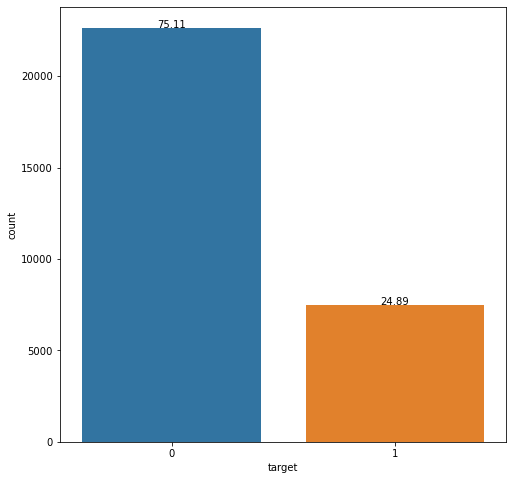

In [19]:
plt.figure(figsize=(8,8))
total = float(len(data_train) )

ax = sns.countplot(x="target", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center") 
    
plt.show()

In [20]:
maior=menor=total=0
for x in data_train['target']:
    if x=="<=50K":
        menor+=1
    else:
        maior+=1
    total+=1

print(menor,maior)
print("Menor que 50K: " + str((menor*100)/total) + "%")
print("Maior que 50K: " + str((maior*100)/total) + "%")

0 30162
Menor que 50K: 0.0%
Maior que 50K: 100.0%


Após a análise deste displot, pode-se concluir que o dataset fornecido está desbalanceado, ou seja, a maior parte das classificações de salário do dataset são "<=50K" (por volta dos 75%) enquanto que uma pequena parte do dataset representa as classificações de salário iguais a ">50K" (por volta dos 25%).
Isto, em príncipio, vai fazer com o que o nosso modelo classifique muito bem para casos em que a classificação de salário é igual a "<=50K", enquanto que a classificação de salário igual a ">50K" vai ser má, pois está mal representada no dataset.

### Diferença salarial entre sexos

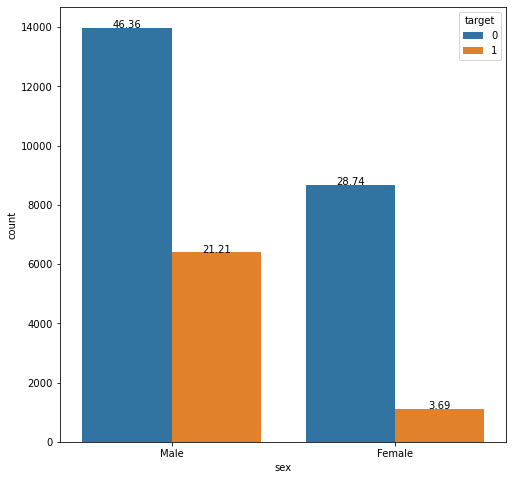

In [21]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x="sex", hue="target", data=data_train)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center") 
    
plt.show()

Na imagem anterior, ha uma grande desproporção entre homens e mulhers no que toca à classificação salariar. Vamos continuar a investigar isto com o objetivo de encontrar algum tipo de informação relevate.

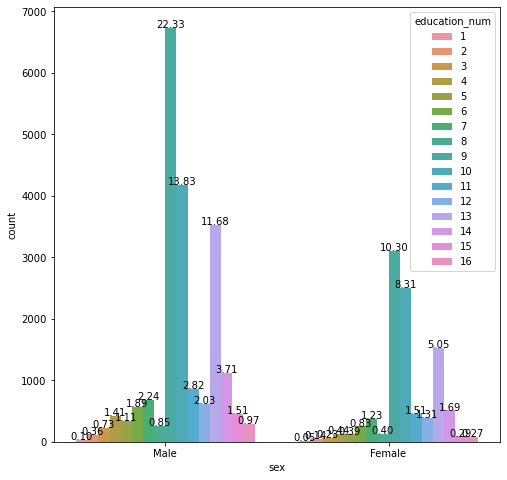

In [22]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x="sex", hue="education_num", data=data_train)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center") 
    
plt.show()

Consegue-se verificar que tanto os homens como as mulheres acabam por ter uma distribuição entre o nível de educação muito parecido.

posx and posy should be finite values
posx and posy should be finite values


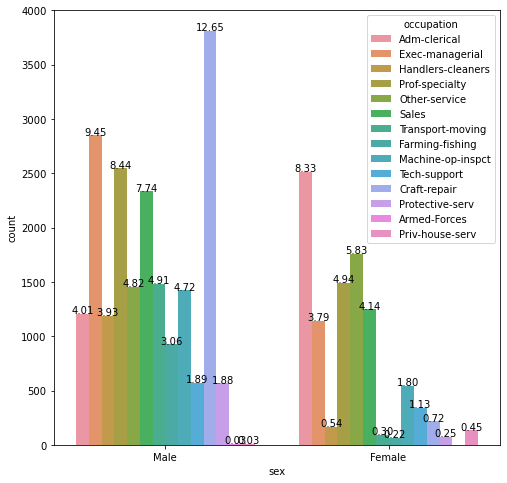

In [23]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x="sex", hue="occupation", data=data_train)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center") 
    
plt.show()

Mesmo a ocupção não é muito diferente entre os sexos.

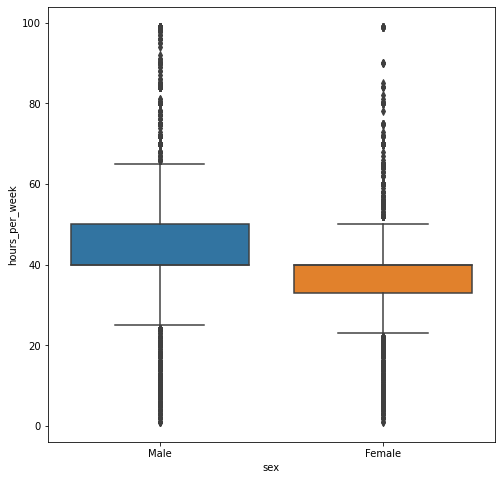

In [24]:
plt.figure(figsize=(8,8))
sns.boxplot(x="sex", y="hours_per_week", data=data_train)
plt.show()

A partir deste Box Plot, pode-se concluir que a maior parte das pessoas do sexo feminino trabalha menos horas semanais do que as pessoas do sexo masculino.

In [25]:
data_train[['sex', 'hours_per_week']].groupby(['sex'], as_index=False).mean().sort_values(by='hours_per_week', ascending=True)

,sex,hours_per_week
0,Female,36.932222
1,Male,42.850687


Começou-se por ver que havia uma diferença salarial entre pessoas de dois sexos diferentes, ou seja, em que pessoas do sexo masculino ganhavam, em geral, mais que pessoas do sexo feminino. Analisou-se depois que o nível de educação entre os dois sexos é muito parecido, mas viu-se também que a ocupação entre os sexos acaba por ser diferente e também que em geral uma pessoa do sexo masculino acaba por trabalhar mais que uma pessoa do sexo feminino.

Tendo tudo isto em consideração, justifica-se a diferença salarial entre os dois sexos, especialmente pois o número de horas de trabalho traduz quanto uma pessoa vai gastar no final do mês. No entanto, podem haver variáveis que nós não estamos a estudar.

### Algumas informações extra

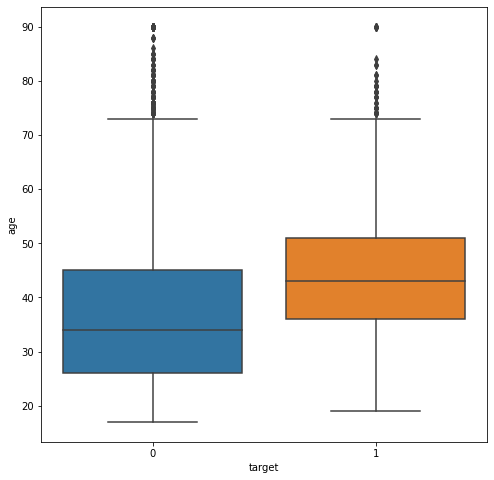

In [26]:
plt.figure(figsize=(8,8))
sns.boxplot(x="target", y="age", data=data_train)
plt.show()

In [27]:
data_train[['target', 'age']].groupby(['target'], as_index=False).mean().sort_values(by='age', ascending=False)

,target,age
1,1,43.95911
0,0,36.60806


Nota-se que a média de idades dos indivíduos que estão classificados em termos salariais ">50K" é maior que "<=50K". Este resultado seria de se esperar, pois geralmente quanto mais velho uma pessoa for, mais experiência tem e a experiência vai-se traduzir em aumentos salariais.

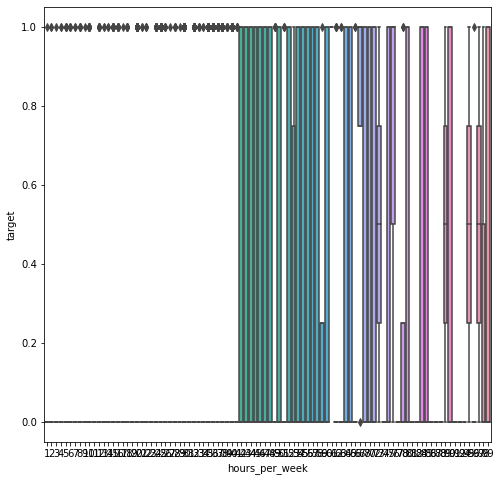

In [28]:
plt.figure(figsize=(8,8))
sns.boxplot(x="hours_per_week", y="target", data=data_train)
plt.show()

In [29]:
data_train[['target', 'hours_per_week']].groupby(['target'], as_index=False).mean().sort_values(by='hours_per_week', ascending=False)

,target,hours_per_week
1,1,45.706580
0,0,39.348592


Nota-se aqui também que a média de horas de trabalho por semana dos indivíduos cujos classifação salarial corresponde a "<=50K" é menor do que a média de horas de trabalhos semanais dos indivíduos classificados salarialmente como ">50K".

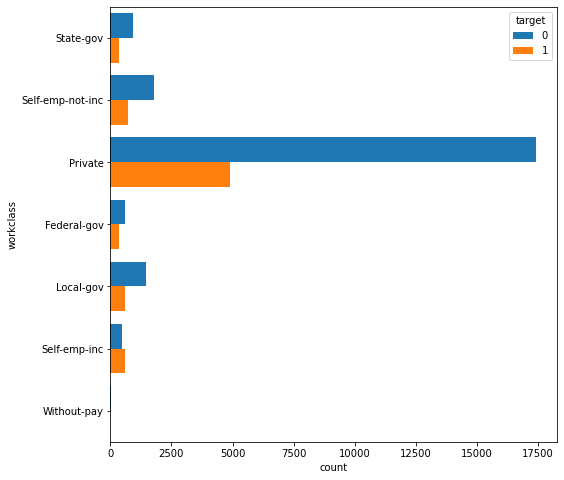

In [30]:
plt.figure(figsize=(8,8))
p=sns.countplot(data=data_train,y="workclass", hue="target", saturation=1)

Um dado interessante e possivelmente importante é que, os indivíduos "Self-emp-inc" ganham mais que as restantes das workclasses, pois este é o uníco caso em que o número de pessoas classificado salarialmente como ">50K" é maior que o número de pessoas classificadas como "<=50K".

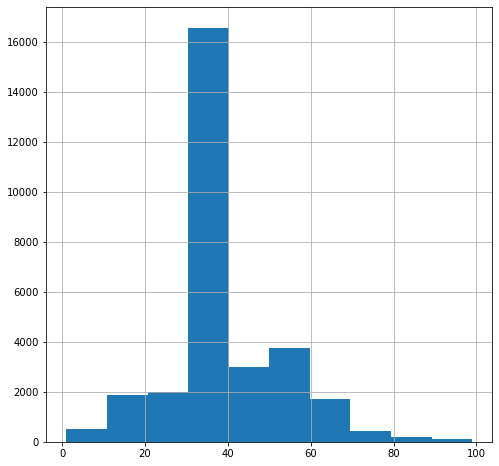

In [31]:
data_train['hours_per_week'].hist(figsize=(8,8))
plt.show()

Pode-se ver que a maior parte das pessoas trabalha entre 30 a 40 horas semanais.

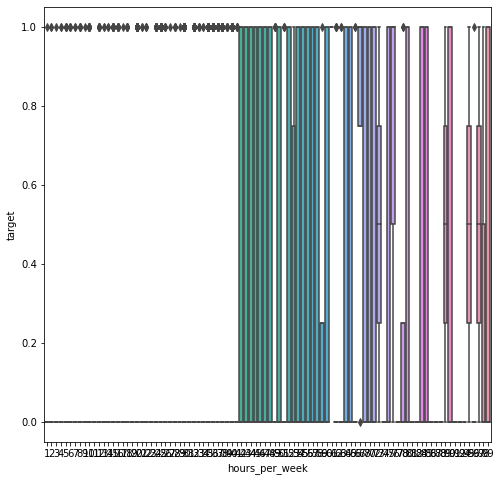

In [32]:
plt.figure(figsize=(8,8))
sns.boxplot(x="hours_per_week", y="target", data=data_train)
plt.show()

Esta imagem mostra-nos que existem muitos outliers em ambas as categorias, mas principalmente na categoria "<=50K", o que é normal, pois como vimos anteriormente, o dataset contém muita mais informação sobre esta categoria.

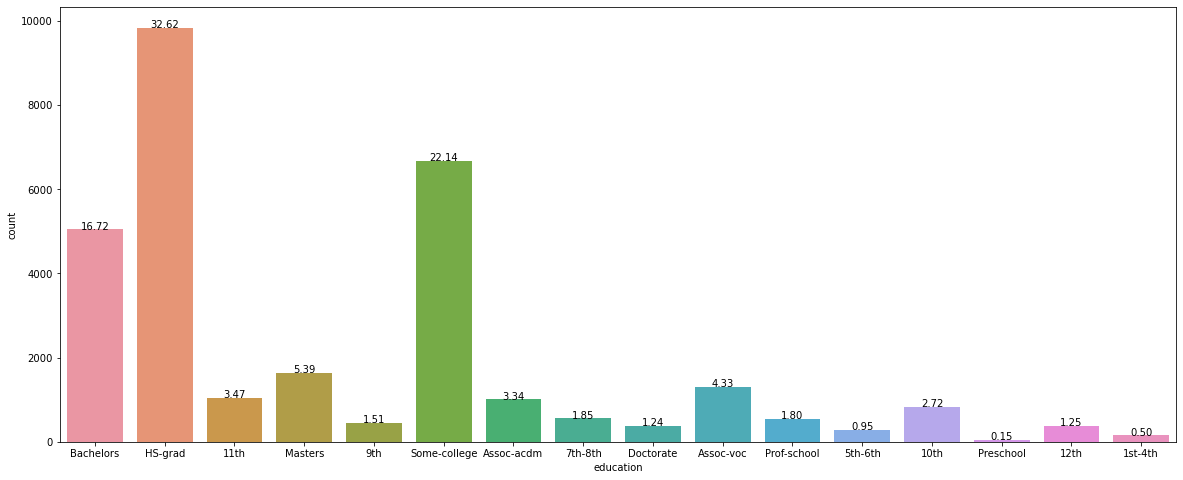

In [33]:
plt.figure(figsize=(20,8))
total = float(len(data_train["target"]) )

ax = sns.countplot(x="education", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Verifica-se que existem 16 categorias diferentes para o atributo education. A categoria "HS-grad", que representa as pessoas que acabaram o ensino secundário, tem por volta de 32,63%, sendo o atributo com maior frequência.

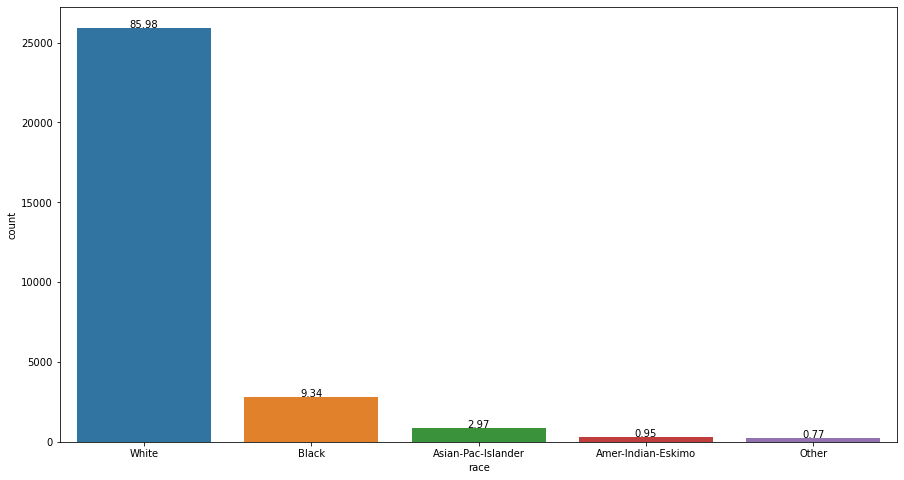

In [34]:
plt.figure(figsize=(15,8))
total = float(len(data_train))

ax = sns.countplot(x="race", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Mais uma vez verifica-se que o dataset não está balanceado, neste caso na feature race. Existe uma clara superioridade, em termos de números, na categoria White.

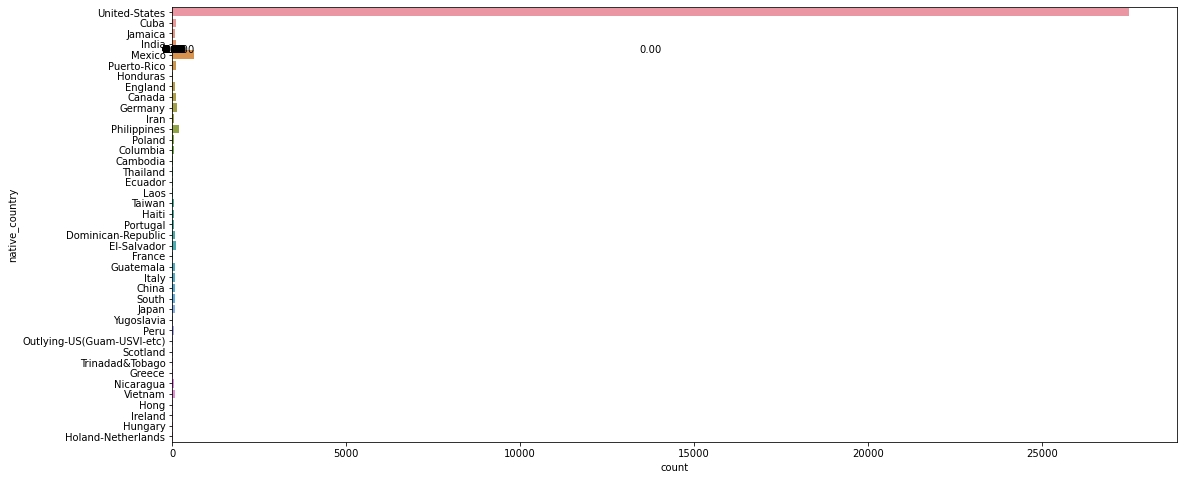

In [35]:
plt.figure(figsize=(18,8))
total = float(len(data_train))

ax = sns.countplot(y="native_country", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

O mesmo se verifica para a feature native_country, onde se vê que a maioria dos trabalhadores são dos Estados Unidos da América.

In [36]:
data_train = createFeature(data_train)

In [37]:
data_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,age_range,work,status_civic,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,adult,full-time,single,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,seniors,part-time,married,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,adult,full-time,single,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,seniors,full-time,married,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,adult,full-time,married,0


### Correlações entre features

#### Relação entre age e income

Hipótese nula : não há diferença entre a média de idades do grupo de income <=50k e grupo de income >50k.

Hipótese alternativa : há diferença entre a média de idades do grupo de income <=50k e grupo de income >50k.

In [38]:
data = data_train[(np.abs(stats.zscore(data_train["age"])) < 3)] 

income_1 = data_train[data_train['target']==1]['age']
income_0 = data_train[data_train['target']==0]['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [39]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

ttest 3.6779175770271126
p value 0.0003077351060590459
Aceita-se a hipótese alternativa.


Conclui-se que a feature age tem uma relação importante com a feature income.

#### Relação entre hours_per_week e income
Hipótese nula : não há diferença entre a média de horas trabalhadas por semana do grupo de income <=50k e grupo de income >50k.

Hipótese alternativa : há diferença entre a média de horas trabalhadas por semana do grupo de income <=50k e grupo de income >50k.

In [40]:
data = data[(np.abs(stats.zscore(data["hours_per_week"])) < 3)] 

income_1 = data[data['target']==1]["hours_per_week"]
income_0 = data[data['target']==0]["hours_per_week"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',format(pval, '.70f'))

if pval <0.05:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

ttest 3.903010550536453
p value 0.0001302098250627426541305847740304102444497402757406234741210937500000
Aceita-se a hipótese alternativa.


Conclui-se que a feature hours_per_week tem uma relação importante com a feature income.

#### Relação entre fnlwgt e income
Hipótese nula : não há diferença entre a média de fnlwgt do grupo de income <=50k e grupo de income >50k.

Hipótese alternativa : há diferença entre a média de fnlwgt do grupo de income <=50k e grupo de income >50k.

In [41]:
data = data[(np.abs(stats.zscore(data["fnlwgt"])) < 3)] 

income_1 = data[data['target']==1]["fnlwgt"]
income_0 = data[data['target']==0]["fnlwgt"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

ttest 0.09359144782954779
p-value 0.9255284394807071
Aceita-se a hipótese nula.


Conclui-se que a feature fnlwgt não tem uma relação importante com a feature income.

#### Relação entre capital_gain e income
Hipótese nula : não há diferença entre a média de capital_gain do grupo de income <=50k e grupo de income >50k.

Hipótese alternativa : há diferença entre a média de capital_gain do grupo de income <=50k e grupo de income >50k.

In [42]:
data = data[(np.abs(stats.zscore(data["capital_gain"])) < 3)] 

income_1 = data[data['target']==1]["capital_gain"]
income_0 = data[data['target']==0]["capital_gain"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

ttest 4.196889963067678
p-value 5.60790797677811e-05
Aceita-se a hipótese alternativa.


Conclui-se que a feature capital_gain tem uma relação importante com a feature income.

#### Relação entre capital_loss e income
Hipótese nula : não há diferença entre a média de capital_loss do grupo de income <=50k e grupo de income >50k.

Hipótese alternativa : há diferença entre a média de capital_loss do grupo de income <=50k e grupo de income >50k.

In [43]:
income_1 = data[data['target']==1]["capital_loss"]
income_0 = data[data['target']==0]["capital_loss"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

ttest 2.6352513659092978
p-value 0.009544610140800271
Aceita-se a hipótese alternativa.


Conclui-se que a feature capital_loss tem uma relação importante com a feature income.

#### Relação entre workclass e income
Hipótese nula : não existe qualquer tipo de relação entre a feature workclass e a feature income.

Hipótese alternativa : existe relação entre a feature workclass e a feature income.

In [44]:
c_t = pd.crosstab(data['workclass'].sample(frac=0.002, replace=True, random_state=1),data['target'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

target,0,1
workclass,,
Local-gov,3,2
Private,29,9
Self-emp-inc,2,0
Self-emp-not-inc,4,2
State-gov,6,1


In [45]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

dof=4
[[ 3.79310345  1.20689655]
 [28.82758621  9.17241379]
 [ 1.51724138  0.48275862]
 [ 4.55172414  1.44827586]
 [ 5.31034483  1.68965517]]
probability=0.950, critical=9.488, stat=1.976
Aceita-se a hipótese nula.


Conclui-se que a feature workclass não tem uma relação importante com a feature income.

#### Relação entre education e income
Hipótese nula : não existe qualquer tipo de relação entre a feature education e a feature income.

Hipótese alternativa : existe relação entre a feature education e a feature income.

In [46]:
c_t = pd.crosstab(data['education'].sample(frac=0.002, replace=True, random_state=1),data['target'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

target,0,1
education,,
10th,1,0
12th,1,0
5th-6th,0,1
7th-8th,1,0
Assoc-acdm,1,0
Assoc-voc,2,1
Bachelors,6,3
Doctorate,0,1
HS-grad,24,3


In [47]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print("p-value", p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

dof=10
p-value 0.027985051784219617
[[ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 2.27586207  0.72413793]
 [ 6.82758621  2.17241379]
 [ 0.75862069  0.24137931]
 [20.48275862  6.51724138]
 [ 2.27586207  0.72413793]
 [ 7.5862069   2.4137931 ]]
probability=0.950, critical=18.307, stat=20.137
Aceita-se a hipótese alternativa.


Conclui-se que a feature education não tem uma relação importante com a feature income.

#### Relação entre marital_status e income
Hipótese nula : não existe qualquer tipo de relação entre a feature marital_status e a feature income.

Hipótese alternativa : existe relação entre a feature marital_status e a feature income.

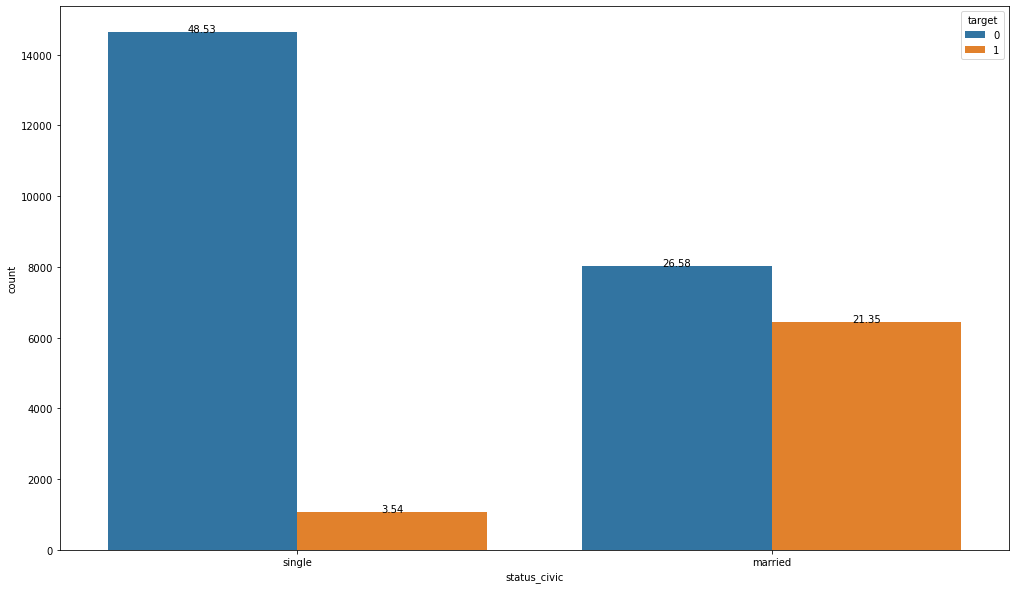

In [48]:
plt.figure(figsize=(17,10))
total = float(len(data_train) )

ax = sns.countplot(x="status_civic", hue="target", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [49]:
c_t = pd.crosstab(data['status_civic'].sample(frac=0.002, replace=True, random_state=1),data['target'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

target,0,1
status_civic,,
married,16,11
single,28,3


In [50]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
print(stat)

if abs(stat) >= critical:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

dof=1
p_value 0.014284097947827482
[[20.48275862  6.51724138]
 [23.51724138  7.48275862]]
probability=0.950, critical=3.841, stat=6.003
6.00268817204301
Aceita-se a hipótese alternativa.


Conclui-se que a feature marital-status tem algum tipo de relação importante com a feature income.

#### Relação entre occupation e income
Hipótese nula : não existe qualquer tipo de relação entre a feature marital_status e a feature income.

Hipótese alternativa : existe relação entre a feature marital_status e a feature income.

In [51]:
c_t = pd.crosstab(data['occupation'].sample(frac=0.002, replace=True, random_state=1),data['target'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

target,0,1
occupation,,
Adm-clerical,11,1
Craft-repair,9,3
Exec-managerial,4,2
Farming-fishing,1,0
Handlers-cleaners,3,0
Machine-op-inspct,2,0
Other-service,5,0
Prof-specialty,4,5
Protective-serv,2,1


In [52]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

dof=10
[[9.10344828 2.89655172]
 [9.10344828 2.89655172]
 [4.55172414 1.44827586]
 [0.75862069 0.24137931]
 [2.27586207 0.72413793]
 [1.51724138 0.48275862]
 [3.79310345 1.20689655]
 [6.82758621 2.17241379]
 [2.27586207 0.72413793]
 [3.03448276 0.96551724]
 [0.75862069 0.24137931]]
probability=0.950, critical=18.307, stat=13.553
Aceita-se a hipótese nula.


Conclui-se que a feature occupation não tem uma relação importante com a feature income.

#### Relação entre race e income
Hipótese nula : não existe qualquer tipo de relação entre a feature race e a feature income.

Hipótese alternativa : existe relação entre a feature race e a feature income.

In [53]:
c_t = pd.crosstab(data['race'].sample(frac=0.002, replace=True, random_state=1),data['target'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

target,0,1
race,,
Amer-Indian-Eskimo,1,0
Asian-Pac-Islander,3,0
Black,2,0
Other,1,0
White,37,14


In [54]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

dof=4
p_value 0.6387406763981135
[[ 0.75862069  0.24137931]
 [ 2.27586207  0.72413793]
 [ 1.51724138  0.48275862]
 [ 0.75862069  0.24137931]
 [38.68965517 12.31034483]]
probability=0.950, critical=9.488, stat=2.533
Aceita-se a hipótese nula.


Conclui-se que a feature race não tem uma relação importante com a feature income.

#### Relação entre native-country e income
Hipótese nula : não existe qualquer tipo de relação entre a feature native-country e a feature income.

Hipótese alternativa : existe relação entre a feature native-country e a feature income.

In [55]:
c_t = pd.crosstab(data['native_country'].sample(frac=0.002, replace=True, random_state=1),data['target'].sample(frac=0.002, 
replace=True, random_state=1),margins = False)
c_t

target,0,1
native_country,,
England,1,0
Germany,0,1
Mexico,0,1
Poland,0,1
Portugal,1,0
Puerto-Rico,1,0
United-States,41,11


In [56]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

dof=6
p_value 0.10029948408650134
[[ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [39.44827586 12.55172414]]
probability=0.950, critical=12.592, stat=10.636
Aceita-se a hipótese nula.


Conclui-se que a feature native_country não tem uma relação importante com a feature income.

#### Relação entre age_range e income
Hipótese nula : não existe qualquer tipo de relação entre a feature age_range e a feature income.

Hipótese alternativa : existe relação entre a feature age_range e a feature income.

In [60]:
c_t = pd.crosstab(data['age_range'].sample(frac=0.002, replace=True, random_state=1),data['target'].sample(frac=0.002, 
replace=True, random_state=1),margins = False)
c_t

target,0,1
age_range,,
Old,1,0
adult,27,7
seniors,10,7
young,6,0


In [61]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

dof=3
p_value 0.16069534393761406
[[ 0.75862069  0.24137931]
 [25.79310345  8.20689655]
 [12.89655172  4.10344828]
 [ 4.55172414  1.44827586]]
probability=0.950, critical=7.815, stat=5.156
Aceita-se a hipótese nula.


Conclui-se que a feature age_range não tem uma relação importante com a feature income.

#### Relação entre work e income
Hipótese nula : não existe qualquer tipo de relação entre a feature work e a feature income.

Hipótese alternativa : existe relação entre a feature work e a feature income.

In [66]:
c_t = pd.crosstab(data['work'].sample(frac=0.002, replace=True, random_state=1),data['target'].sample(frac=0.002, 
replace=True, random_state=1),margins = False)
c_t

target,0,1
work,,
Workaholic,1,0
full-time,29,6
over-time,9,8
part-time,5,0


In [67]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

dof=3
p_value 0.0521268133903936
[[ 0.75862069  0.24137931]
 [26.55172414  8.44827586]
 [12.89655172  4.10344828]
 [ 3.79310345  1.20689655]]
probability=0.950, critical=7.815, stat=7.722
Aceita-se a hipótese nula.


Conclui-se que a feature age_range não tem uma relação importante com a feature income.

#### Relação entre status_civic e income
Hipótese nula : não existe qualquer tipo de relação entre a feature status_civic e a feature income.

Hipótese alternativa : existe relação entre a feature status_civic e a feature income.

In [71]:
c_t = pd.crosstab(data['status_civic'].sample(frac=0.002, replace=True, random_state=1),data['target'].sample(frac=0.002, 
replace=True, random_state=1),margins = False)
c_t

target,0,1
status_civic,,
married,16,11
single,28,3


In [72]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

dof=1
p_value 0.014284097947827482
[[20.48275862  6.51724138]
 [23.51724138  7.48275862]]
probability=0.950, critical=3.841, stat=6.003
Aceita-se a hipótese alternativa.


Conclui-se que a feature status_civic tem uma relação importante com a feature income.

In [57]:
transformType(data_train)

Todos estes resultados podem ser vistos na seguinte matriz de correlação.

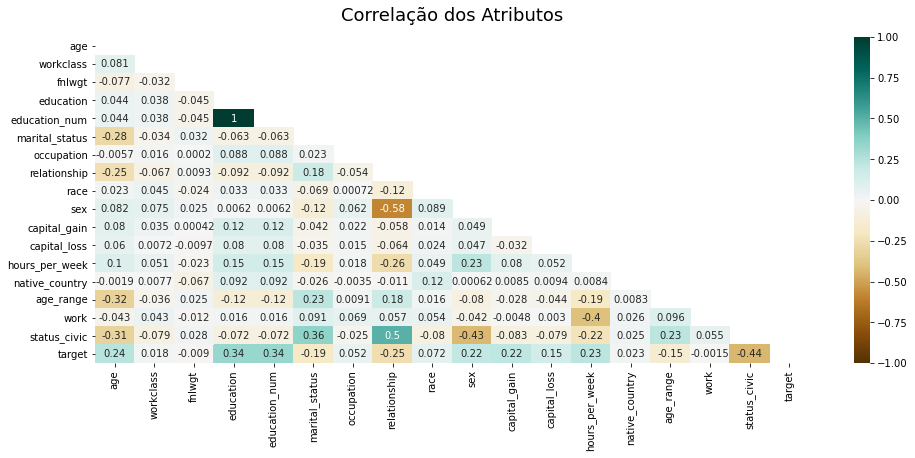

In [59]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_train.corr(), mask=mask, vmin=1, vmax=-1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação dos Atributos', fontdict={'fontsize':18}, pad=16);

No entanto, conlcui-se que as seguintes features não têm qualquer tipo de relação importante com a feature income, apesar de as features terem correlações altas entre si.

#### Relação entre relationship e income
Hipótese nula : não existe qualquer tipo de relação entre a feature relationship e a feature income.

Hipótese alternativa : existe relação entre a feature relationship e a feature income.

In [ ]:
c_t = pd.crosstab(data['relationship'].sample(frac=0.002, replace=True, random_state=1),data['target'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")

#### Relação entre sex e income
Hipótese nula : não existe qualquer tipo de relação entre a feature gender e a feature income.

Hipótese alternativa : existe relação entre a feature gender e a feature income.

In [ ]:
c_t = pd.crosstab(data['sex'].sample(frac=0.002, replace=True, random_state=1),data['target'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

In [ ]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print("Aceita-se a hipótese alternativa.")
else:
    print("Aceita-se a hipótese nula.")